#Klasifikasi Gagal Jantung (Heart Failure) menggunakan Support Vector Machine dan Optimisasi Firefly Algorithm

Anggota Kelompok 3 :
- Abiyyu Rasyiq Muhadzzib
- Khoirunnisa
- Yazid Hilmi Allamsyah
- Andika Putra Perdana
- Moh Alwi Fuad
- Felix Windriyareksa Hardyan
- Muhamad Kayla Izzatta
- Raditya Rafif Rizqullah

# 1. Business Understanding

- Tujuan utama proyek ini adalah untuk membangun model machine learning untuk mengklasifikasikan apakah pasien dengan penyakit gagal jantung memiliki kemungkinan untuk bertahan hidup atau tidak.

- Model yang akan digunakan adalah Support Vector Machine (SVM) dengan kernel RBF yang akan dioptimasi menggunakan Firefly Algorithm.

- Hasil akhir dari model ini diharapkan dapat membantu tenaga medis dalam mengidentifikasi pasien dengan risiko gagal jantung tinggi untuk mendapatkan perawatan yang lebih intensif.

#2. Data Understanding


Dataset yang digunakan adalah `heart_failure_dataset.csv`, yang berisi data pasien dengan berbagai fitur klinis dan label target `DEATH_EVENT (0: Selamat, 1: Meninggal)`.

Dataset ini memiliki fitur-fitur sebagai berikut:
1. `age`: Usia pasien (tahun)
2. `anaemia`: Anemia (0 = tidak, 1 = ya)
3. `creatinine phosphokinase (CPK)`: Level enzim CPK dalam darah (mcg/L)
4. `diabetes`: Diabetes (0 = tidak, 1 = ya)
5. `ejection fraction`: Persentase darah yang dipompa keluar oleh jantung (%)
6. `high blood pressure`: Hipertensi (0 = tidak, 1 = ya)
7. `platelets`: Jumlah trombosit dalam darah (kiloplatelets/mL)
8. `sex`: Jenis kelamin (0 = perempuan, 1 = laki-laki)
9. `serum creatinine`: Kreatinin serum (mg/dL)
10. `serum sodium`: Natrium serum (mEq/L)
11. `smoking`: Kebiasaan merokok (0 = tidak, 1 = ya)
12. `time`: Periode tindak lanjut (hari)
13. `DEATH_EVENT (Target)`: Pasien meninggal (0: selamat, 1: meninggal)

**Sumber Dataset:** Davide Chicco, Giuseppe Jurman: "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020). https://doi.org/10.1186/s12911-020-1023-5



## 2.1 Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE  # SMOTE untuk oversampling
import random

## 2.2 Exploratory Data Analysis (EDA)

### 2.2.1 Read CSV

In [ ]:
df = pd.read_csv("/content/heart_failure_dataset.csv")

### 2.2.2 Checking Dataset Content

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


### 2.2.3 Dataset Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### 2.2.4 Descriptive Statistics

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### 2.2.5 Checking Duplicates

In [ ]:
num_duplicates = df.duplicated().sum()
if num_duplicates > 0:
    print(f"\nJumlah data duplikat: {num_duplicates}")
else:
    print("\nTidak ada data duplikat.")


Tidak ada data duplikat.


### 2.2.6 Correlation Heatmap

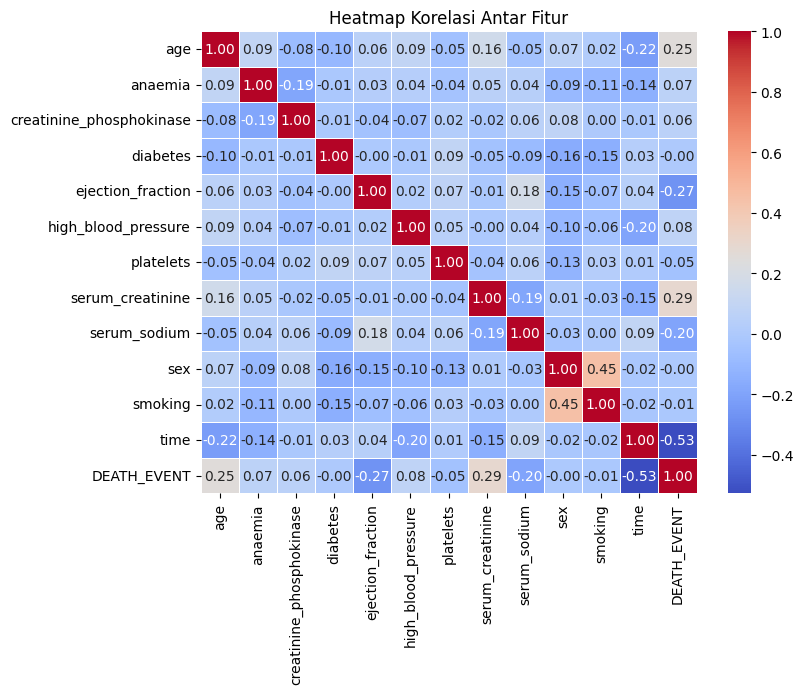

In [ ]:
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

Berikut penjelasan correlation heatmap antar fitur pada dataset `heart failure` ini:<br/>
A. Korelasi Positif <br/>
- Fitur `serum_creatinine` memiliki korelasi positif sebesar `0.29`, yang berarti kadar kreatinin serum yang lebih tinggi berkaitan dengan meningkatnya risiko kematian pasien.

- Fitur `age` menunjukkan korelasi positif sebesar `0.25`, yang berarti usia yang lebih tua cenderung meningkatkan risiko kematian.

- Fitur `anaemia` memiliki korelasi positif sebesar `0.07`, yang berarti pasien dengan anemia sedikit lebih berisiko mengalami kematian.

B. Korelasi Negatif <br/>
- Fitur `time` memiliki korelasi negatif sebesar `-0.53`, yang berarti semakin lama `follow-up time` pasien, semakin kecil kemungkinan pasien mengalami kematian.

- Fitur `ejection_fraction` menunjukkan korelasi negatif sebesar `-0.27`, yang berarti semakin rendah kemampuan jantung dalam memompa darah (fraksi ejeksi), semakin tinggi risiko kematian pasien.

- Fitur `serum_sodium` memiliki korelasi negatif sebesar `-0.20`, yang berarti kadar natrium serum yang rendah dapat meningkatkan kemungkinan kematian pasien.


C. Korelasi Lainnya <br/>
- Fitur `sex` menunjukkan korelasi positif sebesar `0.45` dengan fitur `smoking`, ini menunjukan bahwa pria cenderung lebih sering merokok dalam dataset ini.






## 2.3 Checking Outlier

In [ ]:
def detect_outliers(df):
    outlier_info = {}
    # looping untuk setiap kolom numerik, kecuali target
    for col in df.select_dtypes(include=["number"]).columns:
        if col != "DEATH_EVENT": # kolom target
            Q1, Q3 = df[col].quantile([0.25, 0.75])
            IQR = Q3 - Q1
            lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR # Batas bawah & atas
            num_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0] # Jumlah outlier

            if num_outliers > 0:
                outlier_info[col] = num_outliers # Simpan jumlah outlier per kolom

    return outlier_info

In [ ]:
def plot_outliers(df, outlier_info):
    if not outlier_info:
        print("Tidak ada outlier untuk divisualisasikan.")
        return
    # Buat subplot untuk tiap kolom yang memiliki outlier
    plt.figure(figsize=(15, 8))
    for i, (col, count) in enumerate(outlier_info.items(), 1):
        plt.subplot(2, (len(outlier_info) // 2) + 1, i)
        sns.boxplot(y=df[col], width=0.4)
        plt.title(f"{col}\n{count} Outliers", fontsize=12)
        plt.ylabel("")

    plt.tight_layout()
    plt.show()

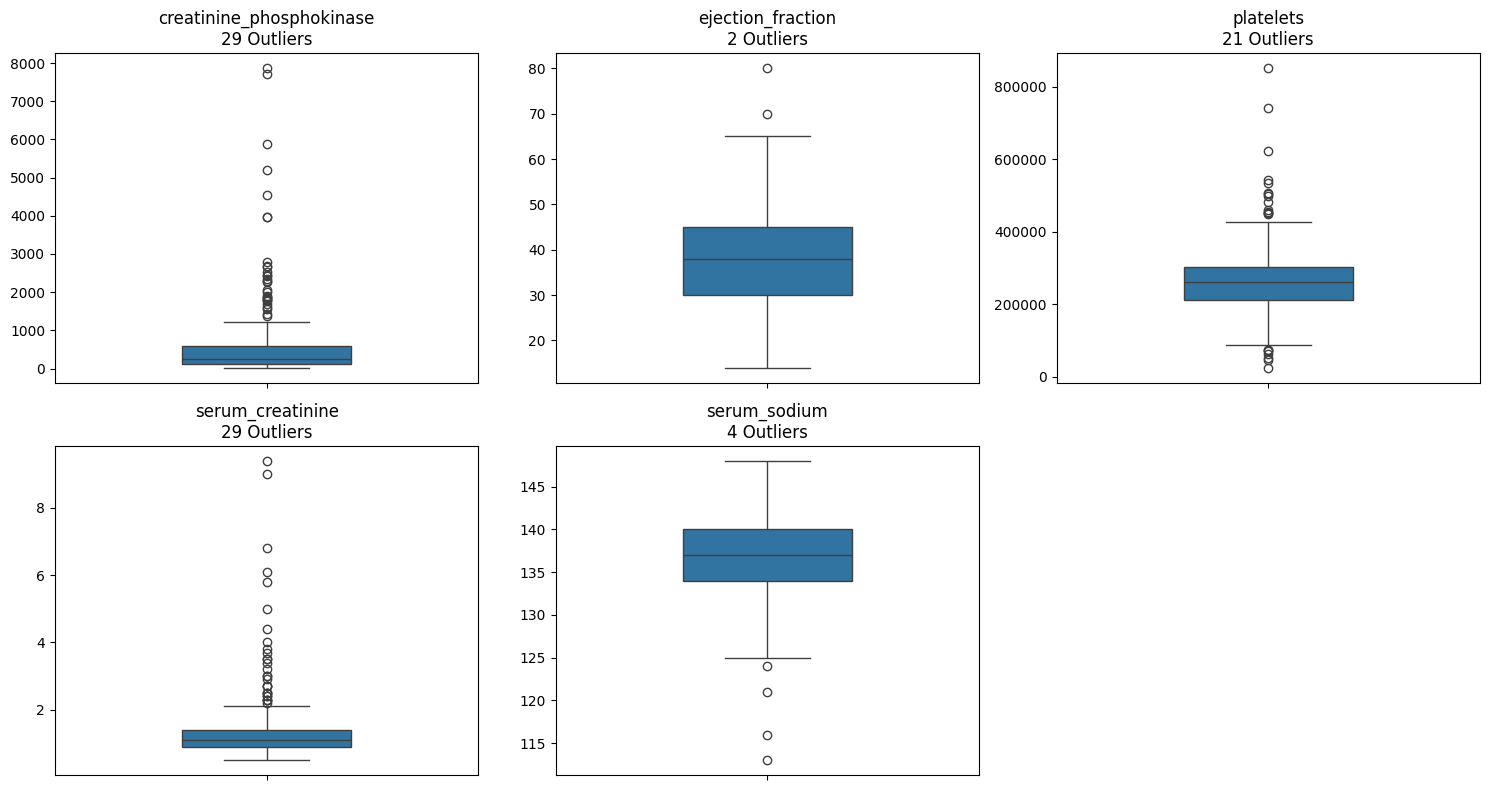

In [ ]:
# call function
outliers = detect_outliers(df)
plot_outliers(df, outliers)

# 3. Data Prep

## 3.1 Winsorizing Outlier

In [ ]:
from scipy.stats.mstats import winsorize

def winsorize_outliers(df, lower_percentile=0.05, upper_percentile=0.95):
    # Melakukan Winsorizing hanya pada fitur yang memiliki outlier berdasarkan IQR
    df_winsorized = df.copy()
    outlier_info = detect_outliers(df)

    for col in outlier_info.keys(): # Hanya proses fitur yang memiliki outlier
        df_winsorized[col] = winsorize(df_winsorized[col], limits=(lower_percentile, 1 - upper_percentile))

    return df_winsorized

# Winsorizing fitur yang memiliki outlier
df_clean = winsorize_outliers(df)

In [ ]:
print(f"\nJumlah data sebelum winsorizing: {df.shape[0]}")
print(f"Jumlah data setelah winsorizing: {df_clean.shape[0]}")


Jumlah data sebelum winsorizing: 299
Jumlah data setelah winsorizing: 299


## 3.2 Feature and Target Selection

In [ ]:
# Menentukan fitur (X) dan target (y)
X = df_clean.drop(columns=["DEATH_EVENT"])
y = df_clean["DEATH_EVENT"]

## 3.3 Feature Normalization

In [ ]:
# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 3.4 Checking Class Distribution

In [ ]:
# Cek distribusi kelas
class_counts = pd.Series(y).value_counts()
print("\nDistribusi Kelas (Sebelum Split):")
print(class_counts)


Distribusi Kelas (Sebelum Split):
DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


<ipython-input-22-f0f819dffb1e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y.value_counts().index, y=y.value_counts().values, palette="coolwarm")


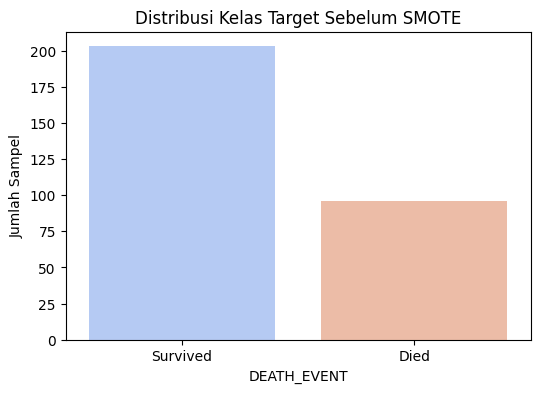

In [ ]:
# Visualisasi distribusi kelas sebelum SMOTE
plt.figure(figsize=(6, 4))
sns.barplot(x=y.value_counts().index, y=y.value_counts().values, palette="coolwarm")
plt.xticks([0, 1], ["Survived", "Died"])
plt.ylabel("Jumlah Sampel")
plt.title("Distribusi Kelas Target Sebelum SMOTE")
plt.show()

## 3.5 SMOTE

In [ ]:
# Melakukan SMOTE
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Cek distribusi kelas setelah SMOTE
class_counts_resampled = pd.Series(y_resampled).value_counts()
print("\nDistribusi Kelas Setelah SMOTE (Sebelum Split):")
print(class_counts_resampled)


Distribusi Kelas Setelah SMOTE (Sebelum Split):
DEATH_EVENT
1    203
0    203
Name: count, dtype: int64


<ipython-input-24-4c69fb5cf551>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts_resampled.index, y=class_counts_resampled.values, palette="coolwarm")


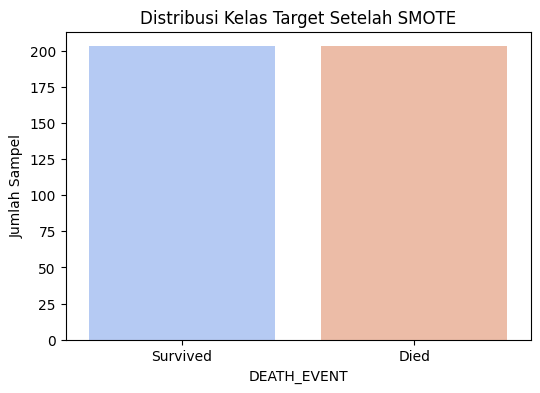

In [ ]:
# Visualisasi distribusi kelas setelah SMOTE
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts_resampled.index, y=class_counts_resampled.values, palette="coolwarm")
plt.xticks([0, 1], ["Survived", "Died"])
plt.ylabel("Jumlah Sampel")
plt.title("Distribusi Kelas Target Setelah SMOTE")
plt.show()

## 3.6 Data Splitting

In [ ]:
# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# 4. Modeling

## 4.1 Firefly Algorithm Optimization

In [ ]:
import numpy as np
from numpy.random import default_rng

class FireflyAlgorithm:
    def __init__(self, pop_size=30, alpha=0.2, betamin=1.0, gamma=1.0, seed=None):
        self.pop_size = pop_size  # Jumlah fireflies (solusi)
        self.alpha = alpha  # Faktor acak
        self.betamin = betamin  # Daya tarik minimum
        self.gamma = gamma  # Koefisien absorpsi cahaya
        self.rng = default_rng(seed)  # Random number generator

    # Firefly Algorithm untuk optimasi
    def optimize(self, function, dim, lb, ub, max_evals):
        # Inisialisasi posisi firefly secara acak dalam ruang pencarian
        fireflies = self.rng.uniform(lb, ub, (self.pop_size, dim)) # Inisialisasi fireflies
        intensity = np.apply_along_axis(function, 1, fireflies) # Evaluasi fitness
        best_idx = np.argmin(intensity) # Cari solusi terbaik
        best_solution = fireflies[best_idx]
        best_fitness = intensity[best_idx]

        evaluations = self.pop_size # Hitung evaluasi awal
        new_alpha = self.alpha # Langkah adaptif
        search_range = np.array(ub) - np.array(lb) # Ruang pencarian

        while evaluations < max_evals:
            new_alpha *= 0.97  # Kurangi ukuran langkah adaptif secara bertahap
            for i in range(self.pop_size):
                for j in range(self.pop_size):
                    if intensity[i] >= intensity[j]:
                        # Hitung jarak kuadrat antara firefly i dan j
                        r = np.sum(np.square(fireflies[i] - fireflies[j]))
                        beta = self.betamin * np.exp(-self.gamma * r) # Hitung daya tarik
                        # Hitung langkah acak dan pindahkan firefly
                        steps = new_alpha * (self.rng.random(dim) - 0.5) * search_range
                        fireflies[i] += beta * (fireflies[j] - fireflies[i]) + steps
                        # Batasi solusi dalam range
                        fireflies[i] = np.clip(fireflies[i], lb, ub)
                        # Evaluasi solusi baru
                        intensity[i] = function(fireflies[i])
                        evaluations += 1
                        # Perbarui solusi terbaik jika perlu
                        if intensity[i] < best_fitness:
                            best_fitness = intensity[i]
                            best_solution = fireflies[i]

            print(f"Evaluation: {evaluations}, Best Acc: {-best_fitness:.4f}, C: {best_solution[0]:.4f}, Sigma: {best_solution[1]:.4f}")

        return best_solution, -best_fitness # Return parameter terbaik dan akurasi terbaik

In [ ]:
def svm_fitness(params):
    C, sigma = params
    model = SVC(C=C, kernel="rbf", gamma=sigma)
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy") # Evaluasi model dengan 10-Fold CV
    return -np.mean(scores) # negatif akurasi karena Firefly Algorithm meminimalkan fungsi

In [ ]:
lower_bounds = [1.0, 0.1] # Batas bawah C dan sigma
upper_bounds = [3.0, 1.0] # Batas atas C dan sigma
dimension = 2 # Jumlah parameter yang dioptimasi (C dan sigma)
max_evals = 50 # Jumlah evaluasi maksimal

# Inisialisasi FA
fa = FireflyAlgorithm(pop_size=30, alpha=0.2, betamin=1.0, gamma=1.0)

# Jalankan FA untuk mencari kombinasi C dan sigma terbaik
best_params, best_accuracy = fa.optimize(svm_fitness, dimension, lower_bounds, upper_bounds, max_evals)

# nilai optimal C dan sigma terbaik
optimal_C, optimal_sigma = best_params
print(f"\nOptimal C: {optimal_C:.4f}, Optimal Sigma: {optimal_sigma:.4f}, Best Acc: {best_accuracy:.4f}")

Evaluation: 331, Best Acc: 0.8677, C: 2.7312, Sigma: 0.1464

Optimal C: 2.7312, Optimal Sigma: 0.1464, Best Acc: 0.8677


## 4.2 Training FA SVM Model

In [ ]:
final_model = SVC(C=optimal_C, kernel="rbf", gamma=optimal_sigma)
final_model.fit(X_train, y_train)

SVC(C=np.float64(2.731228467122834), gamma=np.float64(0.14637309100347884))

## 4.3 Save Model

In [ ]:
import pickle

with open("fa_svm_model.pkl", "wb") as model_file, open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(final_model, model_file)
    pickle.dump(scaler, scaler_file)

## 4.4 Load Model

In [ ]:
# Memuat model SVM dan scaler dari file pickle
def load_model_and_scaler(model_path="fa_svm_model.pkl", scaler_path="scaler.pkl"):
    with open(model_path, "rb") as model_file, open(scaler_path, "rb") as scaler_file:
        model = pickle.load(model_file)
        scaler = pickle.load(scaler_file)
    return model, scaler

saved_final_model, saved_scaler = load_model_and_scaler()

# 5. Evaluation

## 5.1 Test Accuracy

In [ ]:
y_pred = saved_final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)

print(f"test accuracy: {final_accuracy:.4f}")

test accuracy: 0.9024


## 5.2 Classification Report

In [ ]:
print(classification_report(y_test, y_pred, target_names=["Survived", "Died"]))

              precision    recall  f1-score   support

    Survived       0.92      0.88      0.90        41
        Died       0.88      0.93      0.90        41

    accuracy                           0.90        82
   macro avg       0.90      0.90      0.90        82
weighted avg       0.90      0.90      0.90        82



## 5.3 Confusion Matrix

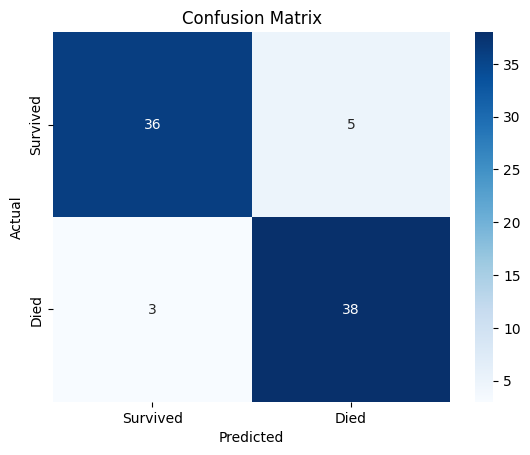

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Survived", "Died"],
            yticklabels=["Survived", "Died"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Data pasien (urutan fitur harus sama dengan X_train)
data_new = np.array([
    [50.0, 0, 196, 0, 45, 0, 395000.0, 1.6, 136, 1, 1, 285],  # Survived
    [75.0, 0, 582, 0, 20, 1, 265000.0, 1.9, 130, 1, 0, 4]     # Died
])

# Transformasi pakai scaler yang sudah fit sebelumnya
data_new_scaled = saved_scaler.transform(data_new)

# Prediksi
predictions = saved_final_model.predict(data_new_scaled)

# Interpretasi hasil
for i, pred in enumerate(predictions, 1):
    status = "Survived" if pred == 0 else "Died"
    print(f"Pasien {i}: {status}")


Pasien 1: Survived
Pasien 2: Died


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# 6. Deployment

Pada proyek ini, proses deployment dilakukan menggunakan library Streamlit,  pengguna dapat mengunggah dataset, melihat evaluasi performa model, serta melakukan prediksi terhadap pasien baru melalui form input untuk menerapkan proses inference secara real time.